In [30]:
#!pip install textblob
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [1]:
from textblob import TextBlob
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

## Sentiment Analysis Using `TextBlob`

In [4]:
# Sample earnings call snippet
transcript = """
We are pleased to report a strong quarter with significant growth in revenue and profit.
However, we faced challenges due to supply chain disruptions, but we have plans in place to mitigate these issues.
"""

# Performing sentiment analysis
analysis = TextBlob(transcript)
sentiment = analysis.sentiment

# Displaying sentiment results
print("Polarity:", sentiment.polarity)  # Range from -1 (negative) to 1 (positive)
print("Subjectivity:", sentiment.subjectivity)  # Range from 0 (objective) to 1 (subjective)

Polarity: 0.29583333333333334
Subjectivity: 0.7458333333333333


**Explanation**:
- `Polarity` indicates the sentiment (positive or negative) of the text.
- `Subjectivity` indicates how subjective or opinionated the text is.

## Named Entity Recognition (NER) Using `spaCy`

In [8]:
# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Sample earnings call snippet
transcript = """
We have seen positive trends in our European and North American markets.
Our CEO John Smith is confident in our future growth, especially with the new product lines launching next quarter.
"""

# Process the text
doc = nlp(transcript)

# Print named entities, their labels, and the text
for ent in doc.ents:
    print(ent.text, ent.label_)

European NORP
North American NORP
John Smith PERSON
next quarter DATE


**Explanation**:

This code identifies named entities like companies, locations, and people in the transcript, which can provide insights into the focus of the discussion.

## Topic Detection Using Latent Dirichlet Allocation (LDA) with scikit-learn

In [12]:
# Sample earnings call snippets
documents = [
    "Our growth in the Asian markets has surpassed expectations.",
    "We are addressing supply chain issues to ensure steady production.",
    "The new product line is expected to drive significant revenue."
]

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
doc_term_matrix = vectorizer.fit_transform(documents)

# Fit the LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(doc_term_matrix)

# Display the topics
for i, topic in enumerate(lda.components_):
    print(f"Topic {i}:")
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-5:]])


Topic 0:
['steady', 'issues', 'chain', 'addressing', 'ensure']
Topic 1:
['significant', 'expected', 'new', 'line', 'revenue']


**Explanation**:

This code snippet extracts topics from earnings call text snippets to identify key themes and topics discussed during calls.

## Sentiment Detection for Deception Analysis

In [16]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Sample sentence with potential deceptive cues
sentence = "Our growth has been promising, but we are not responsible for the unexpected setbacks."

# Analyze sentiment
scores = analyzer.polarity_scores(sentence)

# Display the scores
print("Sentiment Scores:", scores)

Sentiment Scores: {'neg': 0.143, 'neu': 0.644, 'pos': 0.214, 'compound': 0.0534}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/c47e0470-b83d-48c6-a026-
[nltk_data]     413daab4c753/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Explanation**:

The `compound` score from `VADER` helps assess the overall sentiment of a sentence, which can be used to detect positive spin or blame-shifting language.

## Using VADER for Sentiment Analysis in Earnings Calls

### Overview of Compound Score:
The `compound` score from VADER (Valence Aware Dictionary and sEntiment Reasoner) is a useful metric that provides a single measure of the overall sentiment for a piece of text. This score ranges from `-1` (most negative) to `1` (most positive), giving a quick way to assess whether a sentence or document carries a negative, neutral, or positive tone.

### How the Compound Score Works:
- **Positive Score**: A compound score close to `1` indicates strong positive sentiment.
- **Neutral Score**: A compound score near `0` suggests a neutral tone.
- **Negative Score**: A compound score close to `-1` reflects strong negative sentiment.

### Application in Earnings Calls:
Earnings calls often contain subtle language that can influence investor perception. Positive spin or blame-shifting language can be detected by analyzing the sentiment expressed in statements.

- **Positive Spin**: Using overly optimistic language to downplay negative outcomes.
- **Blame-Shifting**: Deflecting responsibility onto external factors to maintain a positive outlook.

### Detailed Examples and Comparison:

#### Example 1: Neutral Sentiment

In [20]:
analyzer = SentimentIntensityAnalyzer()

sentence = "Our revenue for this quarter was in line with expectations."
scores = analyzer.polarity_scores(sentence)
print("Sentence:", sentence)
print("Sentiment Scores:", scores)

Sentence: Our revenue for this quarter was in line with expectations.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


**Output Explanation**:

The compound score for this neutral statement is likely close to 0, indicating no strong positive or negative sentiment.

#### Example 2: Positive Spin

In [24]:
sentence = "Despite the challenges, our growth trajectory remains exceptional, and we are poised for success."
scores = analyzer.polarity_scores(sentence)
print("Sentence:", sentence)
print("Sentiment Scores:", scores)

Sentence: Despite the challenges, our growth trajectory remains exceptional, and we are poised for success.
Sentiment Scores: {'neg': 0.063, 'neu': 0.512, 'pos': 0.425, 'compound': 0.7951}


**Output Explanation**:

The compound score for this sentence is expected to be quite high (e.g., 0.7 to 1.0). The use of words like "exceptional" and "success" reflects a strong positive spin, even though challenges are mentioned.

#### Example 3: Blame-Shifting Language

In [27]:
sentence = "Our results were impacted by unforeseen economic factors beyond our control."
scores = analyzer.polarity_scores(sentence)
print("Sentence:", sentence)
print("Sentiment Scores:", scores)

Sentence: Our results were impacted by unforeseen economic factors beyond our control.
Sentiment Scores: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


**Output Explanation**:

The compound score may be positive or slightly neutral (e.g., 0.0 to 0.5), indicating an attempt to deflect blame. Words like "unforeseen" and "beyond our control" are typical of blame-shifting, where negative outcomes are attributed to external circumstances.

#### Example 4: Strong Negative Sentiment

In [30]:
sentence = "This quarter was a significant disappointment with major revenue losses."
scores = analyzer.polarity_scores(sentence)
print("Sentence:", sentence)
print("Sentiment Scores:", scores)

Sentence: This quarter was a significant disappointment with major revenue losses.
Sentiment Scores: {'neg': 0.435, 'neu': 0.435, 'pos': 0.13, 'compound': -0.6369}


**Output Explanation**:

The compound score for this sentence would be negative (e.g., -0.6 to -1.0), reflecting the strong negative sentiment conveyed by words like "disappointment" and "losses."

### Comparative Analysis:
When analyzing multiple earnings call statements, it's helpful to compare compound scores to identify patterns:

- Consistent Positive Spin: High compound scores across different sections indicate an effort to maintain an optimistic tone.
- Shifts in Sentiment: A sudden drop in compound scores may suggest a change in tone, revealing potential issues or negative news.

### Visualizing Sentiment:
Using `matplotlib` or `seaborn`, you can create visualizations to illustrate the sentiment scores over an entire earnings call transcript:

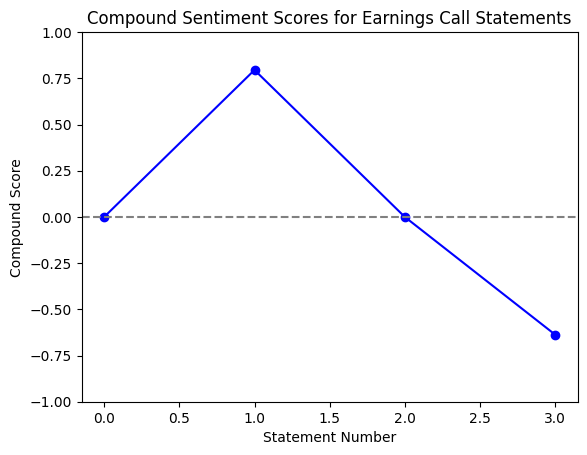

In [33]:
analyzer = SentimentIntensityAnalyzer()
sentences = [
    "Our revenue for this quarter was in line with expectations.",
    "Despite the challenges, our growth trajectory remains exceptional, and we are poised for success.",
    "Our results were impacted by unforeseen economic factors beyond our control.",
    "This quarter was a significant disappointment with major revenue losses."
]

compound_scores = [analyzer.polarity_scores(sentence)['compound'] for sentence in sentences]

plt.plot(compound_scores, marker='o', linestyle='-', color='blue')
plt.title('Compound Sentiment Scores for Earnings Call Statements')
plt.xlabel('Statement Number')
plt.ylabel('Compound Score')
plt.ylim(-1, 1)
plt.axhline(0, color='gray', linestyle='--')
plt.show()

**Explanation of the Plot**:

A plot showing the compound scores for different statements helps visualize where positive spin or blame-shifting might occur. High spikes could indicate overly positive language, while dips show more neutral or negative sentiment.

#### Takeaway:
- Detecting Positive Spin: High compound scores, even when challenges are mentioned, indicate attempts to maintain a positive outlook.
- Identifying Blame-Shifting: Statements with neutral or slightly positive scores that mention external factors suggest deflection of responsibility.